This notebook combines and adapts a bunch of great resources on Machine Learning from:
- last year's version of this notebook
- notebooks from a great series of tutorials on Machine Learning by [UCL AI Society](https://uclaisociety.co.uk) last year and two years ago.

I **highly recommend** having a look at the resources:
- slides, talk recordings and useful overviews on [the society website](https://uclaisociety.co.uk/our-initiatives/tutorials/2023-2024/),
- Jupyter Notebooks with numerous ML code examples available [on GitHub](https://github.com/UCLAIS/ml-tutorials-season-4)!

---

# Machine Learning 101

Supervised learning is a powerful way to teach machines to tackle all kinds of tasks, from recognizing objects in images to predicting future outcomes based on historical data. Here are some key words you should know:
- Learning algorithm
- Training data
- Examples
- Features
- Labels
- Parameters

A simple, yet very important problem we need to tackle is predicting ouput labels based on given input features with a trained model containing parameters that should maximise performance. The model is trained via a learning algoirthm to find these parameters. Linear regression is a technique used to solve problems like this. It allows us to draw a straight line through the scattered data points, allowing us to make predictions and uncover valuable insights.

---

### Additional packages

In this notebook, we will be using a linear algebra package `Numpy`, machine learning package `scikit-learn` and data analysis package `pandas`. 

**NOTE: All packages have really good documentation websites with detailed explanations and user guides**
- numpy [documentation](https://numpy.org/doc/stable/)
- scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html)
- pandas [documentation](https://pandas.pydata.org/docs/)

---

**Please fill in the notebook as you read through.** This shouldn't require a lot of lines of code since we encourage you to use the existing scikit learn functions. These sections are wrapped by "###" comments! The current outputs for each cell show the desired result from your code - if you rerun it with the blank lines that need to be filled in, the output will have errors.

## Part 1: Linear Regression

### Linear regression implemented with Scikit-Learn

In [ ]:
# Import the packages and classes needed in this example:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Create a numpy array of data:
temperature = np.array([0, 4, 35, 28, 21, 24, 17, 22]).reshape((-1, 1))
icecream_sold = np.array([0, 1, 250, 150, 90, 115, 40, 99])

# Create an instance of a linear regression model and fit it to the data with the fit() function:
model = LinearRegression()
model.fit(temperature, icecream_sold)

# The following section will get results by interpreting the created instance:
# Print the Intercept:
print("Intercept:", model.intercept_)

# Print the Slope:
print("Slope:", model.coef_[0])

pred = temperature * model.coef_ + model.intercept_

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Relationship Between Number of Icecream Sold and Temperature")
plt.ylabel("Icecream Sold")
plt.xlabel("Temperature")
plt.plot(temperature, icecream_sold, "b.")

# Plotting prediction computed with line fitting
plt.plot(temperature, pred)

## Line Fitting 
Below, we have generated a set of n examples (a set of features paired with labels) where the labels are linearly mapped from the features with noise added. The goal is to find the best fit line for this dataset. There are many approaches to solve this:

In [ ]:
# Generate a set of examples
np.random.seed(42)
n = 500
X = np.random.randn(n, 1)
y = 2 * X + 1 + 1.2 * np.random.randn(n, 1)

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.show()

### 1. Random Guess
In this example, we only have two parameters $\theta_0$ and $\theta_1$ that define our linear regression model. Since we don't have any better idea right now, how about we just take a random guess? Let's try $\theta_0 = 1$ and $\theta_1 = 2$ and plot the resulting line:

In [ ]:
# method 1
def random_guess(X):
    theta_1 = 1
    theta_0 = 2
    pred = X * theta_1 + theta_0
    return pred


pred1 = random_guess(X)

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.plot(X, pred1, "c-")
plt.show()

That's not terrible for a guess, but our slope is too small. If we were to do better, it might be useful to define some kind of a *cost function* that defines how far off our predictions were from the actual data. For linear regression model, the most natural / common cost function to use is the **Mean Squared Error (MSE)**. Mathematically, MSE is defined as following:

$$MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)^2,$$

where $\theta_0 + \theta_1 x_i$ is the prediction of the model and $y_i$ is the true label.

Since we are randomly guessing, this method is very unreliable and may take many tries to get a good solution.


### 2. Closed-form solution with the Normal Equation

#### 2.1. Maths background (optional)

If you know a bit of linear algebra, you might know that there is a *closed-form* solution to the least-squares problem that gives us the optimal values for $a$ and $b$. We won't go through the proof here, but interested students can check out Lecture 15 of Gilbert Strang's wonderful Linear Algebra lecture series on Youtube. Here is the equation (called the *Normal Equation*) for obtaining the optimal $\theta$ that minimizes the squared loss of our best-fit line:


$$\theta = (X^T X)^{-1} X^T y $$

$X$ is a *matrix* form of the input variables of dimensions $m$ by $n$, where $m$ is the number of data instances (i.e. `len(df)` in our case, $m=200$) and $n$ is the dimension of the feature vectors (for our simple linear regression example, we have $n=2$: $x_1$ representing the TV advertising budget and $x_0$ which is always 1 for the bias term). 

#### 2.2 Implementation using scikit-learn

We'll continue with the code now to show how to use scikit-learn to solve this problem:

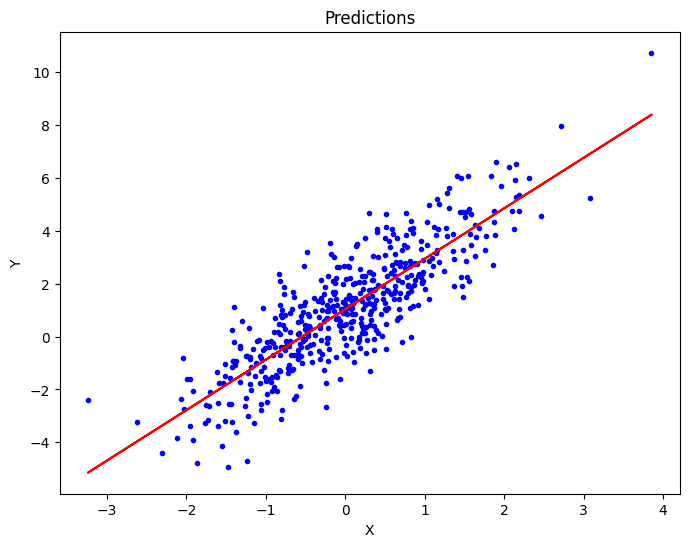

In [13]:
### Set model to a linear regression one with scikit learn, train the model with
### Scikit learn function and store the prediction from your trained model in pred2.

model = None

pred2 = None

###

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.plot(X, pred2, "r-")

### 3. Optimization with Gradient Descent

A problem with calculating the closed-form solution problems like above is that the computation cost of calculating it does not scale efficiently as the number of independent variables increases. In most real-world data, we usually have many independent variables which could affect $y$ in various ways. If we have $k$ such independent variables, then the computational cost of finding the closed-form solution is dominated by the calculation of the inverse of $X^T X$, which is $O(k^3)$. For most real-world data, this is too computationally expensive.

Instead, we can train our linear regression model gradually, using a technique called **gradient descent**. It is as an optimization algorithm that iteratively modifies parameters in way that minimizes a predefined cost function. It does so by finding the derivative of the cost function with regards to the said parameters, which tells the algorithm mathematically how to change each parameter to result in a smaller cost.

#### 3.2 Using Gradient Descent from scikit-learn to solve our problem

First, let's generate some data and visualise them. Hint: we've already done it somewhere in this notebook!

Feel free to experiment how the number of examples influences how good the learned model is. You can inspect the model parameters as `gd_model.coef_` and `gd_model.intercept_` and compare them with the parameters you used to generate the data.

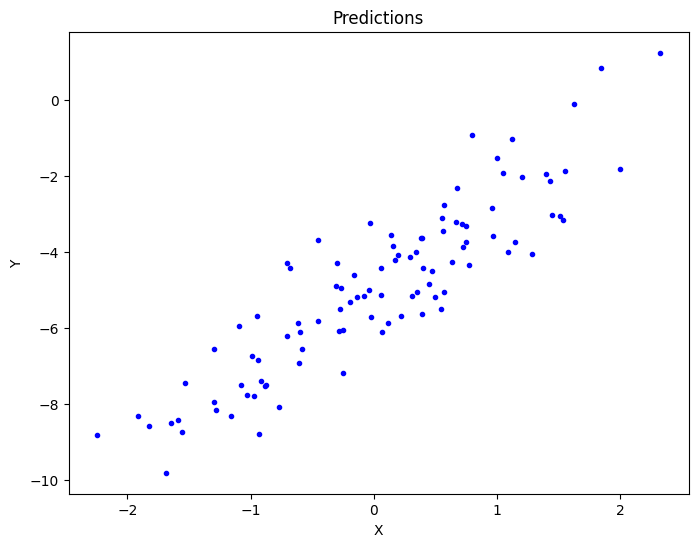

In [ ]:
### Generate a set of 300 examples
n = ...  # number of examples
X = ...  # Generate random points using np.random.randn()
y = (
    ...
)  # apply a linear function to the generated points and add random noise. E.g. 2 * X - 5 + random noise

### Visualise the generated data


# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.show()

Good, now let's apply a gradient descent method from scikit-learn to fit the linear regression model.

c:\Users\suhai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


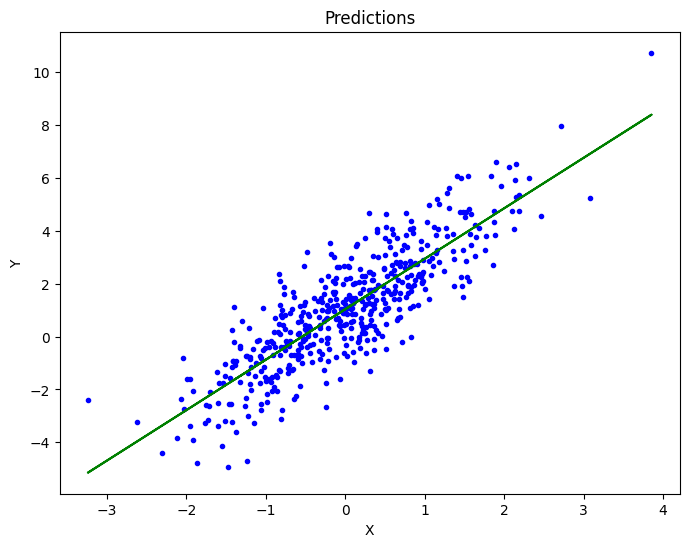

In [ ]:
from sklearn.linear_model import SGDRegressor

### Use the built-in function for SGD regression as your gd_model, train it
### and save prediction in pred3. Only use sklearn functions.

gd_model = None

pred3 = None

###

# Plotting the data.
fig = plt.figure(figsize=(8, 6))
plt.title("Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, y, "b.")
plt.plot(X, pred3, "g-")

#### 3.2 Gradient Descent Implementation (optional)

Now let's derive the derivative of our MSE loss with respect to $\theta_0$ and $\theta_1$. Recall that MSE is expressed as:

$$MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)^2$$

Let's now compute the partial derivate of the loss with regard to parameter $\theta_0$, our bias term:

$$\frac{\partial MSE(\theta)}{\partial \theta_0} = \frac{2}{m}\sum_{i=1}^{m}  ((\theta_0 + \theta_1 x_i) - y_i) \cdot 1 $$

And the partial derivate of the loss with regard to parameter $\theta_1$:

$$\frac{\partial MSE(\theta)}{\partial \theta_1} = \frac{2}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i) \cdot x_i$$


Here is our update rule for the parameters $\theta_0$ and $\theta_1$ at iteration $t$, using gradient descent:

$$\theta_i^{(t+1)} = \theta_i^t - \eta \cdot \frac{\partial MSE(\theta)}{\partial \theta_i} $$

where $\eta$ is what's called the **learning rate**.

Now, let's look at the code for fitting a linear regression model with gradient descent:

Before we optimise with gradient descent, we are going to use `scikit-learn`'s `StandardScaler` to scale our independent variable before adding the bias terms. Otherwise, you'll find that you'll need to use an extremely low learning rate to train the model properly. While we could have used a simpler example where all the data are drawn from a standard normal distribution, we wanted to show you that preprocessing is often a very important step in machine learning projects, because the data you're working with can come in any form!

In [ ]:
# Optional
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def gradient_descent(X, y, learning_rate, record_at, num_iterations=2000):
    theta_0 = np.zeros((1, 1))
    theta_1 = np.zeros((1, 1))
    theta_hist = []

    for it in range(num_iterations):
        ### Type out the three formulae above.
        ### 1) Compute the MSE (mean squared error) for the current values of theta_0 and theta_1.
        ### 2) Compute the gradient of the MSE with respect to theta_0.
        ### 3) Compute the gradient of the MSE with respect to theta_1.

        mse = 0
        d_theta_0 = 0
        d_theta_1 = 0

        ### Now update the values of theta_0 and theta_1 using the fourth formula.

        theta_0 -= 0
        theta_1 -= 0

        ###

        if it in record_at:
            theta_hist.append((theta_0.copy(), theta_1.copy()))
    return theta_0, theta_1, theta_hist


### Choose your learning rate.

lr = 0

###

record_at = [10, 100, 500, 1800]
theta_0, theta_1, theta_hist = gradient_descent(X_scaled, y, lr, record_at)

# Plotting the data.
fig, ax = plt.subplots(1, 4, figsize=(20, 5))


for i in range(4):
    theta_0_it, theta_1_it = theta_hist[i]
    y_pred_it = X_scaled.dot(theta_1_it) + theta_0_it
    ax[i].set_title("Number of Iterations: " + str(record_at[i]))
    ax[i].scatter(X, y)
    ax[i].plot(X, y_pred_it, color="r")
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")

fig.subplots_adjust(wspace=0.5)

plt.show()

## Part 2: Exploring Data and Models

The objectives for this part include:

1.   Introduce and explore a real medical dataset.
2.   Understand two machine learning models.
3.   Attempt to predict the Sex of a patient from features contained in the dataset.
4.   Attempt to predict Fatal Heart Failure from features in the dataset.
5.   Explain what underfitting and overfitting models are.



### Imports

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from time import time

### Dataset Loading

In [3]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/TheRootOf3/cam-coding-ml-workshops/refs/heads/main/2_machine_learning/data/heart_failure_clinical_records_dataset.csv"
)
del dataset["time"]  # not useful in this tutorial

In [4]:
def get_train_test(list_of_features, dependent_variable):
    return train_test_split(
        dataset[list_of_features],
        dataset[dependent_variable],
        test_size=0.2,
        random_state=1,
    )

### Data Dive (No Edits Needed)

#### View the dataset
First, lets take a look at the dataset.

We're using a dataset that contains various features that can be used to predict heart failure.

Lets look at the first few entries of our dataset so we can get to know the features we're working with and their typical values:

In [ ]:
dataset

##Feature Descriptions:

Age: Age (in years) of patient.

Anaemia: Deficiency in the number or quality of red blood cells in your body. (1 = Anaemic patient)

Creatine Phosphokinase: Enzyme that catalyses transfer of Phosphate from creatine to ADP. This creates ATP (basic energy unit) and is a source of rapid ATP (energy) during strenous activity. Think during exercise.

Diabetes: A problem with either insulin production or insulin sensitivity. Leads to high blood sugar and low cellular sugar utilisation. (1 = Patient is Diabetic)

Ejection Fraction: The fraction of the amount of blood pushed out of the left side of the heart during contraction to the amount of blood in the same place before contraction. In healthy individuals, this value is 50-75%: it's not possible to have a perfect system that pushes all blood out. (Value as %)

High Blood Pressure: When the pressure exerted by the blood in your vessels is abnormally high. Reasons could include too much blood, constricted vessels and more. (1 = Patient has HBP)

Platelets: Small, colorless cell fragments in our blood that form clots and stop or prevent bleeding.

Serum Creatinine: The amount of creatinine in the blood. Creatinine is a by product of energy production in muscles and is excreted in the urine to prevent toxic build up.

Serum Sodium: The amount of the chemical element sodium the blood. Sodium has a myriad of roles in physiology including blood volume maintenance, nerve conduction and acid-base balance maintenance.

Sex: Female = 0, Male = 1.

Smoking: 1 = Patient is a smoker.

DEATH_EVENT: 1 represents a Fatal Heart Failure in patient.


### "Quick and Dirty" Statistics

As you can see from the table, we have total of 12 features to play with. Lets look at some "quick and dirty" statistics - easy to obtain stats to begin to help us understand our data. We use a library called `pandas` to do some simple data analysis for us - one of the keys to understanding our data is to know what the typical values are.

Here we have table providing various statistics about each individual feature.

General Note: not all of these statistics may necessarily provide useful insights, but this type of readout is usually a nice starting point.

In [ ]:
dataset.describe()

#### Data Distribution

We can also look at histograms for each feature, allowing us to see the data distribution.

Data distribution readouts can help inform us about any data imbalance in our dataset, for example, sex in this dataset is imbalanced as there are double the number of men than women in the set. This is certainly a problem that needs solving but we don't need to worry about it in this workshop!

Note: Binary features will only have 2 bars on the histogram.

In [ ]:
dataset.hist(figsize=(20, 20), rwidth=0.95)

We've looked at what our features are, their typical values, and the distribution of values for each feature across the dataset. This isn't an exhastive list of insights we can glean from our data but it's a good start and is enough for us to begin with.

Throughout this section we're going to be using different sets of input features in order to create ML models to predict an output feature.

Now we've explored the data, our first task will be to choose a set of features and model parameters to see if we can predict the sex of a patient. However, we first need a model to use...

### Decision Tree Model

#### Model Explaination

Our first model will be the decision tree. A decision tree is pretty similar to a flowchat: a series of sequential decisions (using a tree structure) that will eventually reach a specific result depending on the path taken. The Decision Tree algorithms job is to decide what decisions should be made at each step and tune them to the data it is provided. An example is shown below.

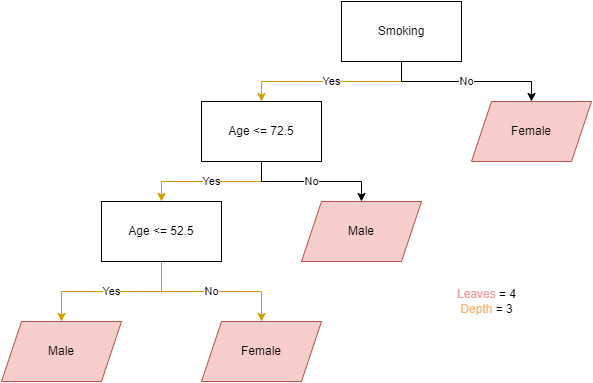

The effectiveness of a machine learning model relies on its data and parameters. In general, we have to input relevant data into the model in order to make sound predictions. Decision Trees further rely on its algorithm parameters. For example, we can choose the number of leaves (nodes with no children) or the maximum depth (largest number of edges from root (topmost node) to leaf) of the tree. In the upcoming task, play around with these numbers and see what effect it has on your model and accuracy.

#### Model Running (code editing section)

To create our decision tree, we are going to use the `scikit-learn` library. `scikit-learn` has lots of machine learning models implemented and ready to use, so our focus is solely on the data and the parameters of the ML model.

As we have seen before, to create a machine learning model using scikit-learn (or in general), we need to follow 5 steps:

1.   Prepare data
2.   Choose and calibrate a model
3.   Fit the data using the model (training)
4.   Predict values using the model (testing)
5.   Evaluate the model

At this point, step 1 is done. In this next code block, you'll choose the features you would like to use in the model and then train, test, and evalate the model. After you evaluate you model, you can either recalibrate your model (model parameters, feature selection or both) to improve on your results, or pat yourself on the back - you've used your first machine learning model!

In [ ]:
# Setting for showing the generated decision tree
show_tree = True

# choose a set of features and model parameters to see if you can predict the sex of a patient
# ********** Step 2 **********

# Parameters for the decision tree.
# Set as 'None' for automatic choice, or choose an appropriate value.
# There are more parameters to fiddle with if you're comfortable reading
# documentation, which can be found here:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Experiment and see what works and what doesn't!
max_number_of_leaves = 15  # integer
max_depth = 10  # integer

# Choose the features you want to use in your model, place between the square
# brackets and seperate features with a comma.
# Example: if we wanted to use the features 'age' and 'smoking', we would write:
# features = ["age", "smoking"]
# Feature List:
# 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
# 'ejection_fraction', 'high_blood_pressure', 'platelets',
# 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'

features = ["age", "smoking", "high_blood_pressure"]

# Define the decision tree classsifier model
classifier = DecisionTreeClassifier(
    random_state=0, max_leaf_nodes=max_number_of_leaves, max_depth=max_depth
)

# ********** Step 3 **********
# Here we obtain our training and testing sets from our dataset and then
# train the model. No need to change anything here.
predict = "diabetes"
# predict = "anemia"
X_train, X_test, y_train, y_test = get_train_test(features, predict)
start_train = time()
classifier = classifier.fit(X_train, y_train)
end_train = time()
training_time = end_train - start_train
print(f"Training took {training_time}s \n")
# ********** Step 4 **********
# Run the trained model on the test set and store the predictions.
y_pred = classifier.predict(X_test)

# ********** Step 5 **********
if show_tree:
    # if the graph isn't readable, fiddle with these settings.
    graph_X_axis_size, graph_Y_axis_size = 25, 25
    fontsize = 10

    plt.figure(figsize=(graph_X_axis_size, graph_Y_axis_size))
    plot_tree(classifier, fontsize=fontsize, feature_names=features)
    print("Decision Tree")
    plt.show()
    print("\n\n")

# Generate a confusion matrix on the predictions to judge model effectiveness.
# If you know that is, great!
# If you don't, focus the decimal on the 'accuracy' line to judge your model,
# we'll learn about confusion matricies at a later date.
print("************************ Confusion Matrix ************************")
print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)
print("******************************************************************")

Once you are happy with your model, move onto the next section, where we will introduce another model.

### Random Forest Model

So we've looked at the Decision Tree model, but why stop at a single tree? The Random Forest model incorporates multiple decision trees (called a 'forest') and the results from the trees are combined to output the final result. We call the model 'random' due to the way we produce the trees: each tree contains a random selection of the provided features. A diagram of the structure of a Random Forest model is shown below.

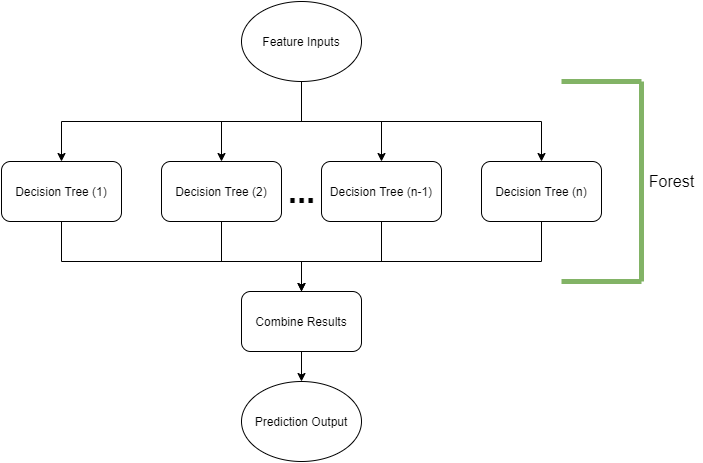

Sounds good right? Well, Random Forests have their positives and negatives. Firstly, more trees means more training, which means longer training times and extra resource usage. Also, if we have a large number of trees in the forest, it may become hard to interpret what exactly the model is looking for when making its predictions - which is a problem if we need an "explainable AI".

On the otherhand, all these extra trees can make for better results: the model can focus on which input features are more heavily weighted for the prediction: not all features will have equal importance.

### Heart Failure Prediction

Now we've got two models to play with, lets move onto a different task. We are going to attempt to predict fatal heart failure from features contained in the dataset.

The "DEATH_EVENT" column in our dataset represents a fatal heart failure in a patient. This is a binary variable - 0 for no death, 1 for death. Using a model of your choice (we've shown you two but if you know about others, feel free to experiment!), try to achieve the best accuracy possible in predicting heart failures. You may choose the parameter settings and which features to input into your model.

Below are two code sections, the first is a Decision Tree model and the second is for a Random Forest model, both of which are setup for this task. Give them both a go and see what results you can obtain!

#### Decision Tree (code editing section)
Note: the code here is the same as before with some minor changes.

In [ ]:
# Setting for showing the generated decision tree
show_tree = True

# Parameters for the decision tree.
# Set as 'None' for automatic choice, or choose an appropriate value.
# There are more parameters to fiddle with if you're comfortable reading
# documentation, which can be found here:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Experiment and see what works and what doesn't!
max_number_of_leaves = 10  # Integer
max_depth = 8  # Integer

# Choose the features you want to use in your model, place between the square
# brackets and seperate features with a comma.
# features = ["age", "smoking"]
# Feature List:
# 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
# 'ejection_fraction', 'high_blood_pressure', 'platelets',
# 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'

features = ["age", "smoking", "high_blood_pressure"]

# Define the decision tree classsifier model
# No need to change anything past here.
classifier = DecisionTreeClassifier(
    random_state=0, max_leaf_nodes=max_number_of_leaves, max_depth=max_depth
)

# Here we obtain our training and testing sets from our dataset and then
# train the model.
predict = "DEATH_EVENT"
X_train, X_test, y_train, y_test = get_train_test(features, predict)
start_train = time()
classifier = classifier.fit(X_train, y_train)
end_train = time()
training_time = end_train - start_train
print(f"Training took {training_time}s \n")

# Run the trained model on the test set and store the predictions.
y_pred = classifier.predict(X_test)

if show_tree:
    # if the graph isn't readable, fiddle with these settings.
    graph_X_axis_size, graph_Y_axis_size = 10, 10
    fontsize = 10

    plt.figure(figsize=(graph_X_axis_size, graph_Y_axis_size))
    plot_tree(classifier, fontsize=fontsize, feature_names=features)
    print("Decision Tree")
    plt.tight_layout()
    plt.show()
    print("\n\n")

# Generate a confusion matrix on the predictions to judge model effectiveness.
# If you know that is, great!
# If you don't, focus the decimal on the 'accuracy' line to judge your model,
# we'll learn about confusion matricies at a later date.
print("************************ Confusion Matrix ************************")
print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)
print("******************************************************************")

#### Random Forest (code editing section)

In [ ]:
# Parameters for the random forest.
# Set as 'None' for automatic choice (unless stated otherwise),
# or choose an appropriate value.
# There are more parameters to fiddle with if you're comfortable reading
# documentation, which can be found here:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Experiment and see what works and what doesn't!
number_of_trees = 100  # Integer, default value 100, no None value
max_number_of_leaves = 10  # Integer
max_depth = 8  # Integer

# Choose the features you want to use in your model, place between the square
# brackets and seperate features with a comma.
# Example: if we wanted to use the features 'age' and 'smoking', we would write:
# features = ["age", "smoking"]
# Feature List:
# 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
# 'ejection_fraction', 'high_blood_pressure', 'platelets',
# 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'

features = ["age", "smoking", "high_blood_pressure"]

# Define the random forest classsifier model
classifier = RandomForestClassifier(
    random_state=0,
    max_depth=max_depth,
    max_leaf_nodes=max_number_of_leaves,
    n_estimators=number_of_trees,
)

# Here we obtain our training and testing sets from our dataset and then
# train the model. No need to change anything here.
predict = "DEATH_EVENT"
X_train, X_test, y_train, y_test = get_train_test(features, predict)
start_train = time()
classifier = classifier.fit(X_train, y_train)
end_train = time()
training_time = end_train - start_train
print(f"Training took {training_time}s \n")

# Run the trained model on the test set and store the predictions.
y_pred = classifier.predict(X_test)

# Generate a confusion matrix on the predictions to judge model effectiveness.
# If you know that is, great!
# If you don't, focus the decimal on the 'accuracy' line to judge your model,
# we'll learn about confusion matricies at a later date.
print("************************ Confusion Matrix ************************")
print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)
print("******************************************************************")

Once you're happy with your results, move onto the next section.

### Overfitting and Underfitting (No Edits Needed)

Before we get into what overfitting and underfitting are, lets talk about generalisation. ML models will attempt to learn concepts that, when applied, allow for accurate predictions for its given task. If the model has generalised the concepts for its well, predictions using unseen data will have a similar accuracy to predictions made on training data. This leads into our first problem, overfitting.

#### Overfitting

Overfitting is a problem in machine learning models when a model learns concepts about its training data so well, it fails to generalise them to the overall task and concequently performs poorly on testing/real-life data.

Lets see overfitting in action.

In [ ]:
def example_model(
    max_depth=None,
    features=["creatinine_phosphokinase", "ejection_fraction"],
    graph=False,
    predict="DEATH_EVENT",
    max_number_of_leaves=None,
):
    classifier = DecisionTreeClassifier(
        random_state=0, max_leaf_nodes=max_number_of_leaves, max_depth=max_depth
    )
    X_train, X_test, y_train, y_test = get_train_test(features, predict)
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    if graph:
        graph_X_axis_size, graph_Y_axis_size = 100, 100
        fontsize = 10
        plt.figure(figsize=(graph_X_axis_size, graph_Y_axis_size))
        plot_tree(classifier, fontsize=fontsize, feature_names=features)
        print("Decision Tree")
        plt.show()
        print("\n\n")
    else:
        print(
            "************************ Confusion Matrix: Training Data ************************"
        )
        print(
            classification_report(
                y_train, classifier.predict(X_train), zero_division=0, digits=3
            )
        )
        ConfusionMatrixDisplay.from_predictions(
            y_true=y_train, y_pred=classifier.predict(X_train)
        )
        print(
            "********************************************************************************"
        )
        print()
        print(
            "************************ Confusion Matrix: Testing Data ************************"
        )
        print(classification_report(y_test, y_pred, zero_division=0, digits=3))
        ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)
        print(
            "********************************************************************************"
        )

In [ ]:
example_model(max_depth=100)

Wow! In this setup we have an amazing 95% accuracy on our training data, but when compared with our real-life testing data, we only obtain 62% accuracy.

For this specific example (Heart Failure) we used a Decision Tree. The problem is due to size of the tree:

In [ ]:
example_model(max_depth=100, graph=True)

Its huge! The decisions in this tree are so specific to the training data there is no chance for generalisation to occur. Fine tuning of parameters will help to solve overfitting. Run the next line of code and compare the training and testing accuracies now that the parameters are more appropriately tuned.

In [ ]:
example_model(max_depth=5)

#### Underfitting

So what about underfitting? This is the opposite problem from overfitting, where we fail to learn enough from training that we obtain poor accuracy in our training and testing results.

In [ ]:
example_model(features=["age"], predict="sex", max_number_of_leaves=2, graph=False)

In this example (Sex prediction from Age), the number of decisions that can be made is so low, the model is predicting exclusively 'male' as the result. In this case, increasing the number of learnable parameters (i.e. number of leaves) will help solve the underfitting.

#### Let's explore this trade-off

Since this is a relatively simple problem, we can gradually increase the model complexity (by increasing the depth parameter of our decision tree) and observe plot the accuracy curves.

In [ ]:
train_set_accs = []
test_set_accs = []

tree_depth_lst = list(range(1, 20))

for tree_depth in tree_depth_lst:
    classifier = DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
    X_train, X_test, y_train, y_test = get_train_test(
        list_of_features=[
            "age",
            "anaemia",
            "creatinine_phosphokinase",
            "diabetes",
            "ejection_fraction",
            # "high_blood_pressure",
            "platelets",
            "serum_creatinine",
            "serum_sodium",
            "sex",
            "smoking",
        ],
        dependent_variable="high_blood_pressure",
    )
    classifier = classifier.fit(X_train, y_train)

    train_set_accs.append(accuracy_score(y_train, classifier.predict(X_train)))
    test_set_accs.append(accuracy_score(y_test, classifier.predict(X_test)))

plt.plot(tree_depth_lst, train_set_accs, label="train set accuracy")
plt.plot(tree_depth_lst, test_set_accs, label="test set accuracy")
plt.xlabel("decision tree depth")
plt.ylabel("model accuracy")
plt.legend()

### The End

Congratulations, you've reached the end of the section! The next one, gives an overview of an end-to-end ML process.

## Part 3: Case-Study: Brain Stroke Prediction 

**Background**: A stroke occurs when the bloody supply to the brain is blocked or when a blood vessel within the brain bursts. Brain cells can begin to die within minutes, so a stroke is a medical emergency, and prompt treatment is crucial. A stroke can cause lasting brain damage, long-term disability and eventually death, so early action is crucial to minimise brain damage and other complications.

**Objective**: Our objective is to be able to predict whether a person has a stroke or not given some information about them.

**Dataset**: The dataset is based on the following [stroke prediction dataset](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset).

The columns in the dataset are:
1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
5) ever_married: "No" or "Yes"
6) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
7) Residence_type: "Rural" or "Urban"
8) avg_glucose_level: average glucose level in blood
9) bmi: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

### Machine Learning Workflow

![title](https://miro.medium.com/max/1400/0*V0GyOt3LoDVfY7y5.png)

As you already know, the machine learning process covers a wide set of steps. As you go through this notebook, try to keep in mind which stage are we dealing with at that moment and what we are trying to achieve. 

As you reach the end of the notebook, you will notice that the sixth step (parameter tuning) from the figure above is missing; this is a challenge for you! Be creative and try to learn something new as you implement your ideas.

In [60]:
# Import relevant libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import relevant sklearn classes/functions related to data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder

# Import relevant sklearn classes related to machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.svm import SVC, SVR, NuSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

# Import relevant sklearn class/function related to evaluation
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay

%matplotlib inline

## Data Loading

In [6]:
# Import the training dataset
data_original = pd.read_csv(
    "https://raw.githubusercontent.com/TheRootOf3/cam-coding-ml-workshops/refs/heads/main/2_machine_learning/data/brain_stroke_train.csv"
)  # Change the path accordingly

# We then make a deep copy of the dataset that we can manipulate
# and process while leaving the original intact
data = data_original.copy()

## Data Understanding & Visualisation

Before we start to train our Machine Learning model, it is important to have a look and understand first the dataset that we will be using. This will provide some insights onto which model, model hyperparameter, and loss function are suitable for the problem we are dealing with. 

In [ ]:
# Let's see the first 15 entries of our dataset
data.head(15)

In [ ]:
# View the size and shape of our training data
print(f"Shape: {data.shape}\n")

# Display the list of features we have
print(f"List of features: {data.columns}\n")

# Check for any missing values
print("Missing values: ")
print(data.isna().sum())

From the dataframe and simple analysis above, there are several things we can observe:

- There are 10 features (excluding `stroke`, which we are trying to predict) and 4500 samples
- The features in our dataset involve both numerical and categorical value
- The range of the numerical features in our dataset varies significantly
- There are no missing data values in our dataset
- We are dealing with a binary classification problem, where the output is either 0 or 1

One of the most important findings from listing even just the first 15 values of our dataset is that we are dealing with an imbalanced classification problem, where the output (whether a person has had a stroke or not) is heavily skewed towards 0 (i.e. not having had a stroke).

In [ ]:
num_stroke_false = len(data[data["stroke"] == 0])
num_stroke_true = len(data[data["stroke"] == 1])

print(f"Number of people that have stroke: {num_stroke_false}")
print(f"Number of people that have stroke: {num_stroke_true}")

In fact, almost 95% of our sample has a label of 0, which indicates that most people in our dataset have not had a stroke.

## Data Visualisation

In general, we know that as the age of a person increases, the chance of that person having a stroke also increases. 

But, is this true? And does it apply to this dataset? We can verify this correlation by producing a plot of the rate of having a stroke against age.

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot()

data["age"] = data["age"].astype(int)

# Calculate the rate of a person getting stroke as a function of age
rate = []
for i in range(data["age"].min(), data["age"].max()):
    rate.append(
        data[data["age"] < i]["stroke"].sum() / len(data[data["age"] < i]["stroke"])
    )

# Draw a lineplote
sns.lineplot(data=rate, ax=ax0)

# Remove the top, right, and left surrounding line for aesthetic purposes
for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

# Adjust the tick appearance for aesthetic purposes
ax0.tick_params(axis="both", which="major", labelsize=8)
ax0.tick_params(axis="both", which="both", length=0)

# Add some text on the figure
ax0.text(
    -3,
    0.055,
    "Stroke Risk by Age",
    fontsize=18,
    fontweight="bold",
)
ax0.text(
    -3,
    0.047,
    "As people age, the risk of having a stroke increases",
    fontsize=14,
)

plt.show()

Yep - as expected, the higher the age, the higher the chance of having a stroke. 

We can also plot two features at once in a single 2d scatter plot! This may be useful if we want to get an additional insight in our data.

For example, let's see what is the relation between 'age' and 'bmi' of our samples.

In [ ]:
plt.scatter(data["age"], data["bmi"], label="age-bmi pair per sample")
plt.xlabel("age")
plt.ylabel("bmi")
plt.legend()
plt.show()

And we can also add mean and standard deviation to understand the graph better!

In [ ]:
plt.scatter(data["age"], data["bmi"], zorder=1, label="age-bmi pair per sample")
bmi_mean = np.array(
    [data[data["age"] == a]["bmi"].mean() for a in data["age"].sort_values().unique()]
)
bmi_std = np.array(
    [data[data["age"] == a]["bmi"].std() for a in data["age"].sort_values().unique()]
)

plt.fill_between(
    data["age"].sort_values().unique(),
    bmi_mean + bmi_std,
    bmi_mean - bmi_std,
    alpha=0.4,
    color="red",
    label="avg bmi +/- 1std",
)
plt.plot(
    data["age"].sort_values().unique(),
    bmi_mean,
    zorder=2,
    color="red",
    label="avg bmi",
)
plt.xlabel("age")
plt.ylabel("bmi")
plt.legend()
plt.show()

As we can see, the age is related to bmi. Younger people in the dataset exhibit lower bmi, with a rapid increase between 10 and 15 years of age. The bmi in older people is higher, but it is varies significantly more. 

## Data Preprocessing

There are a few more things we need to do before we can start training a machine learning model. Among them are the following:
- Converting categorical data into numerical data
- Standardising the range of our datasets

In [ ]:
# Find categorical features, along with their values
# We do this by exploiting the fact that categorical features have a data type of 'object'

for col in data.columns:
    if data[col].dtype == "object":
        print(col, data[col].unique())

We can convert these series to `pd.Categorical` type, which has a special `.codes` attribute!
Let's do it for the `gender` feature.

In [ ]:
# Change the type of gender series to categorical
data["gender"] = pd.Categorical(data["gender"])

# Print the resulting mapping
mapping = dict(
    zip(data["gender"].cat.categories, range(len(data["gender"].cat.categories)))
)
print(mapping)


# Replace the no longer needed column with the codes
data["gender"] = data["gender"].cat.codes

Now we can apply it to the remaining features.

In [ ]:
for feature_name in ["ever_married", "work_type", "Residence_type", "smoking_status"]:
    data[feature_name] = pd.Categorical(data[feature_name])

    mapping = dict(
        zip(
            data[feature_name].cat.categories,
            range(len(data[feature_name].cat.categories)),
        )
    )
    print(mapping)

    data[feature_name] = data[feature_name].cat.codes

In [ ]:
# Let's check our dataset to see whether our categorical data has correctly been changed into numerical data
data.head()

Cool! Now, we have converted the categorical features in our dataset into numerical features. Another way of doing this is by using the [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) class provided by scikit-learn.

**Challenge**: have a think about the way we have encoded our categorical data - what are the potential consequences of encoding categorical data in this way? What might be a better way of encoding this type of data? We'll discuss this further later on in the notebook.

Next, let's standardise the numerical features by taking off the mean and scaling the data to unit variance.

In [ ]:
scaler = StandardScaler()
data[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(
    data[["age", "avg_glucose_level", "bmi"]]
)

# Verify that our feature has been standardized
data.head()

Now that our data has been standardised and all our features are numerical, we are very close to training our first machine learning model.

All that is left to do is the following:

1. **Separate the input features and the output label**: this is an important requirement when training our dataset - we don't want to train our `scikit-learn` models on the data we are trying to predict!

2. **Split our data into training and test sets**: the training set is the dataset on which our models will be trained. After training our models, we then test them on our newly created test set.

We will use the **empirical error** from evaluating our models on the test set as a proxy for the **generalisation error**: a measure of how accurately an algorithm can predict outcomes for unseen data (which is what we are trying to do eventually!). It will also provide us with a useful tool for comparing the different models we have trained so that we can decide which model to use.

In [120]:
# Separate our data into X, which contains all the features in our dataset and y, which contains only the output/label (stroke)
X = data.drop(columns=["stroke"])
y = data["stroke"]

In [ ]:
# Verify that we have correctly separated the features and the output by looking at the shape of X and y
print(X.shape)
print(y.shape)

In [122]:
# Split our features and output into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# In this case, the test_size parameter is equal to 0.2, so our test set will
# have 20% the data, while the training set will have the other 80% of the data

### TODO: try changing the test_size parameter and see whether it impacts the performance of our model

In [ ]:
# Verify that the operation ran as intended by checking the shape of the splitted dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

## Model Training

This is where the magic begins. As an example, we will be training our dataset by using three different models and choosing the best model for submission later. The models we will be testing out are [logistic regression models](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [support vector machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Bear in mind that each of the different types of model has its own set of hyperparameters that you can tune to improve performance. Do check out the documentation for each type of model!

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X=X_train, y=y_train)

clf_svm = SVC()
clf_svm.fit(X=X_train, y=y_train)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X=X_train, y=y_train)

## Model Testing
Now that we have trained our machine learning models, we can test them on our test set

In [125]:
# Use the .predict() method to predict output values for our test set
lr_predicted = clf_lr.predict(X_test)
svm_predicted = clf_svm.predict(X_test)
tree_predicted = clf_tree.predict(X_test)

In [ ]:
# We will be using the accuracy_score() function as our evaluation metric, which simply calculates
# the number of predictions that are correct and divides it by the total number of predictions.
lr_accuracy = accuracy_score(lr_predicted, y_test)
svm_accuracy = accuracy_score(svm_predicted, y_test)
tree_accuracy = accuracy_score(tree_predicted, y_test)

print("Accuracy (Logistic Regression): ", lr_accuracy)
print("Accuracy (SVM): ", svm_accuracy)
print("Accuracy (Decision Tree): ", tree_accuracy)

With Logistic Regression, we can explore which input features contributed most to the decision making process by inspecting the coefficients directly related to the features! 

In [ ]:
sorted(list(zip(clf_lr.coef_[0], data.columns[:-1])), key=lambda x: x[0], reverse=True)

Neat! We can see that the logistic regression model and the SVM performed equally well (with about 95% accuracy), while our decision tree has slightly worst performance.

Let's put things back into perspective. Right now, we are doing an imbalanced classification problem for which only 5% of our outputs have a value of 1; thus, we could easily achieve 95% accuracy just by always outputting 0 even! There is definitely a long way to go with regards to producing a model that is able to predict accurately whether a person has a stroke or not. 

If you're interested in ways to deal with this problem, you should look up how to approach *severe class imbalance in classification tasks*. An example of an approach is oversampling small classes or undersampling the overrepresented cases.

In [ ]:
# We can do further analysis by confusion matrices
print("Confusion Matrix (Logistic Regression)")
print(ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=lr_predicted))

print("\nConfusion Matrix (SVM)")
print(ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=svm_predicted))

print("\nConfusion Matrix (Decision Tree)")
print(ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=tree_predicted))

Congratulations! You made to the end of the final part of this notebook! We hope you enjoyed this short journey through the landscapes of Machine Learning, and will continue exploring further!